In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('week2.csv')

In [6]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,0,Trend
0,AXISBANK,EQ,2017-05-15,503.0,505.00,508.50,498.40,500.25,500.1,502.95,8806756,4.429384e+09,109965,4320438,49.06,5,2017,NaN,0.0,NaN
1,AXISBANK,EQ,2017-05-16,500.1,502.10,504.50,493.50,502.05,501.5,499.85,8610492,4.303938e+09,101028,4027982,46.78,5,2017,0.279944,0.0,Slight or No Change
2,AXISBANK,EQ,2017-05-17,501.5,501.35,506.75,498.50,502.00,502.8,502.88,6443135,3.240154e+09,84189,2876528,44.64,5,2017,0.259222,0.0,Slight or No Change
3,AXISBANK,EQ,2017-05-18,502.8,498.00,499.10,490.25,492.85,492.0,494.96,9227022,4.566993e+09,95624,5348691,57.97,5,2017,-2.147971,0.0,Negative
4,AXISBANK,EQ,2017-05-19,492.0,495.75,503.85,494.20,501.90,501.7,499.10,7611430,3.798900e+09,72985,4190505,55.06,5,2017,1.971545,0.0,Positive


In [7]:
df['Date']=df['Date'].astype(dtype='datetime64')

In [8]:
df.set_index(['Date'],inplace=True)

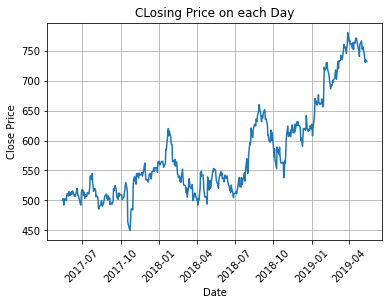

In [9]:
#1
plt.plot(df.index,df['Close Price'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('CLosing Price on each Day')
plt.xticks(rotation=45)
plt.grid(axis='both')

C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(array([736511., 736603., 736695., 736785., 736876., 736968., 737060.,
        737150.]),
 <a list of 8 Text major ticklabel objects>)

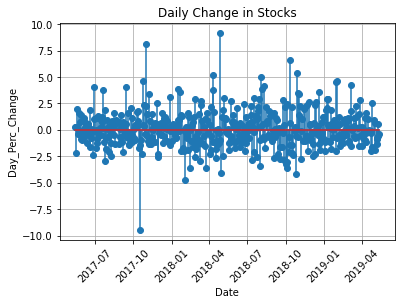

In [10]:
#2
plt.stem(df.index,df['Day_Perc_Change'])
plt.xlabel('Date')
plt.ylabel('Day_Perc_Change')
plt.title('Daily Change in Stocks')
plt.grid(axis='both', b='none')
plt.xticks(rotation=45)

C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


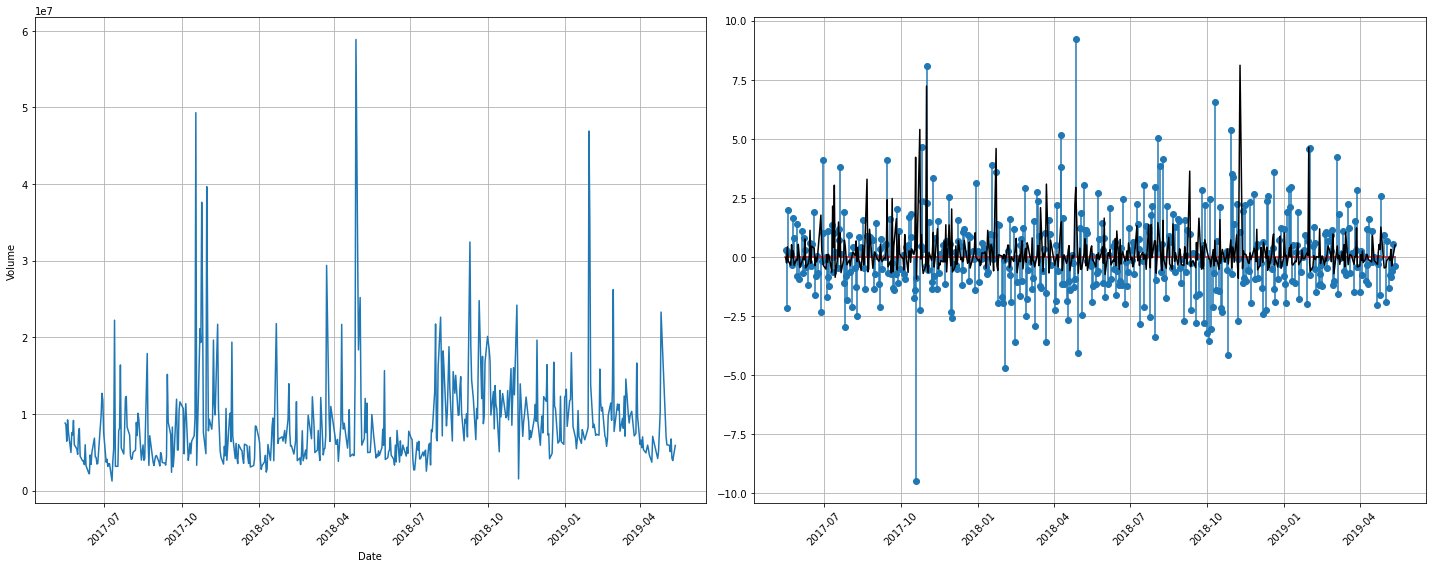

In [11]:
#3
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.grid(axis='both')
plt.plot(df.index,df['Total Traded Quantity'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volume')

plt.subplot(1,2,2)
plt.grid(axis='both')
plt.stem(df.index,df['Day_Perc_Change'])
plt.plot(df.index,df['Total Traded Quantity'].pct_change(),color='black')
plt.xticks(rotation=45)
plt.tight_layout()

(-1.1274820670530505,
 1.106886239402206,
 -1.1040300552933617,
 1.100191907394922)

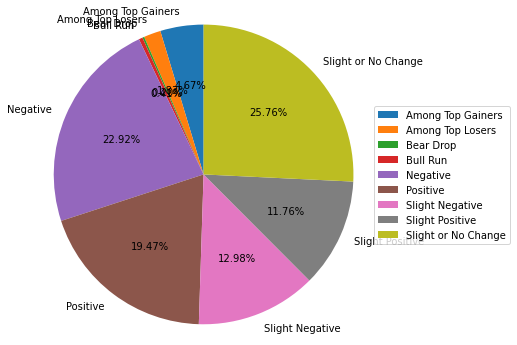

In [12]:
#4
df['Trend Occurance']=np.ones(len(df))
df_=df[['Trend Occurance','Trend']].groupby(by='Trend').sum()/len(df)*100
sizes=df_['Trend Occurance']
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=df_.index,autopct='%1.2f%%',pctdistance=0.6,labeldistance=1.1,startangle=90,center=(0, 0))
plt.legend(loc='center left',bbox_to_anchor=(1,0,0.5,1))
plt.axis('equal')       

No handles with labels found to put in legend.


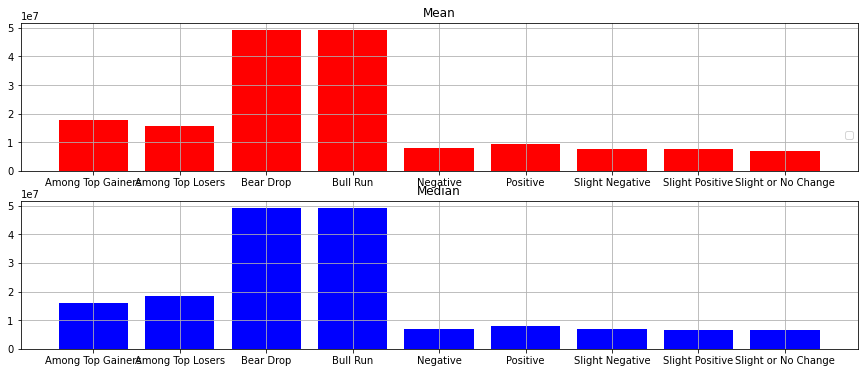

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.grid(axis='both')
plt.title("Mean")
mean=df[['Trend','Total Traded Quantity']].groupby(by='Trend').mean()
plt.bar(mean.index,mean['Total Traded Quantity'],color='red')

plt.subplot(2,1,2)
plt.title('Median')
median=df[['Trend','Total Traded Quantity']].groupby(by='Trend').median()
plt.bar(median.index,median['Total Traded Quantity'],color='blue')
plt.grid(axis='both')

plt.legend(loc='upper right',bbox_to_anchor=(1,0.5,0,1))

C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


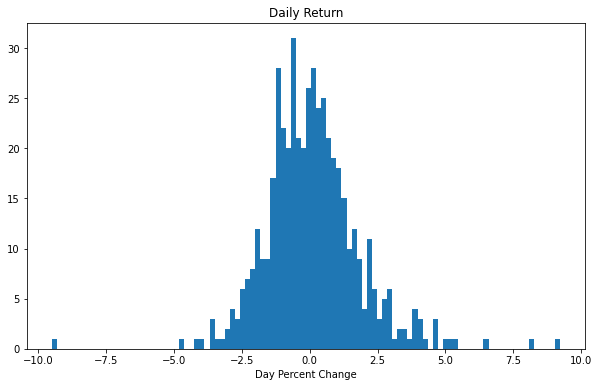

In [14]:
#5
plt.figure(figsize=(10,6))
plt.hist(df['Day_Perc_Change'],bins=100)
plt.title('Daily Return')
plt.xlabel('Day Percent Change')
plt.show()

In [15]:
df1=pd.read_csv('Small_Cap/ASHOKA.csv')
df1=df1[df1.Series == "EQ"]
df1['Date']=df1['Date'].astype('datetime64')
df1.set_index(['Date'],inplace=True)

In [16]:
df2=pd.read_csv('Small_Cap/BAJAJELEC.csv')
df2=df2[df2.Series == "EQ"]
df2['Date']=df2['Date'].astype('datetime64')
df2.set_index(['Date'],inplace=True)

In [17]:
df3=pd.read_csv('Small_Cap/FORTIS.csv')
df3=df3[df3.Series == "EQ"]
df3['Date']=df3['Date'].astype('datetime64')
df3.set_index(['Date'],inplace=True)

In [18]:
df4=pd.read_csv('Small_Cap/IDFC.csv')
df4=df4[df4.Series == "EQ"]
df4['Date']=df4['Date'].astype('datetime64')
df4.set_index(['Date'],inplace=True)

In [19]:
df5=pd.read_csv('Small_Cap/IRCON.csv')
df5=df5[df5.Series == "EQ"]
df5['Date']=df5['Date'].astype('datetime64')
df5.set_index(['Date'],inplace=True)

In [20]:
df_Close_Price=pd.DataFrame({'ASHOKA':df1['Close Price'],'BAJAJELEC':df2['Close Price'],'FORTIS':df3['Close Price'],'IDFC':df4['Close Price'],'ICRON':df5['Close Price']})

In [21]:
df_Close_Price_Percent_Change=df_Close_Price.pct_change()*100
df_Close_Price_Percent_Change.dropna(inplace=True)

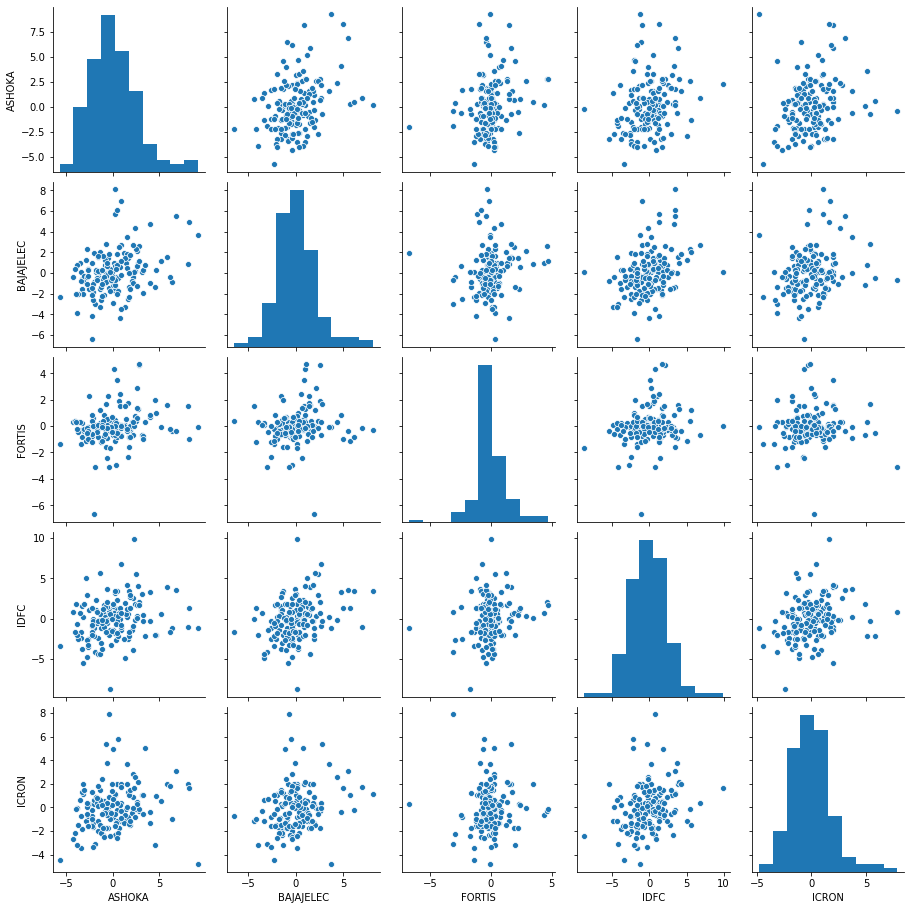

In [22]:
#6
sns.pairplot(df_Close_Price_Percent_Change)

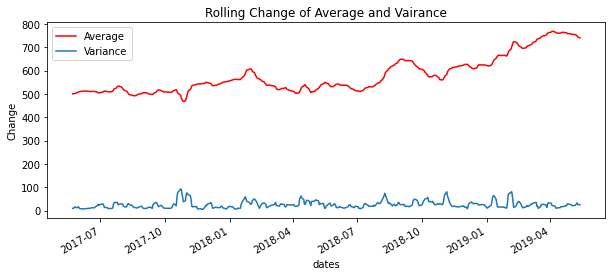

In [23]:
#7
plt.figure(figsize=(10,4))
plt.plot(df['Close Price'].rolling(7).mean(),label='Average',color='red')
var=df['Close Price'].rolling(7).std()*np.sqrt(7)
var.plot(label='Variance')
plt.xlabel('dates')
plt.ylabel('Change')
plt.title('Rolling Change of Average and Vairance')
plt.legend()
plt.show()

In [24]:
#8
df_nifty=pd.read_csv('Nifty50.csv')
nif_date=pd.to_datetime(df_nifty['Date'])
df_nifty_change=df_nifty['Close'].pct_change().fillna(0).rolling(7).std()*np.sqrt(7)

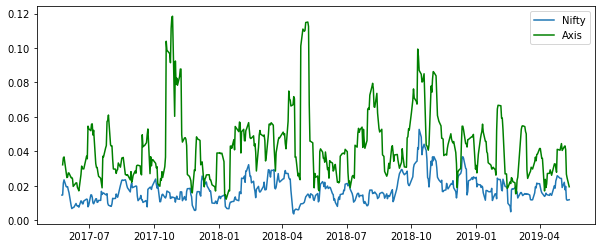

In [25]:
plt.figure(figsize=(10,4))
plt.plot(nif_date,df_nifty_change,label="Nifty")
plt.plot(df.index,df['Close Price'].pct_change().rolling(7).std()*np.sqrt(7),label='Axis',color='green')
plt.legend()
plt.show()

In [26]:
df_tcs=pd.read_csv('LARGE_CAP/TCS.csv')
df_tcs['Date']=df_tcs['Date'].astype('datetime64')
df_tcs.set_index('Date',inplace=True)

In [31]:
#9
short_window = 21
long_window = 34

signals = pd.DataFrame(index=df_tcs.index)
signals['signal'] = 0.0

signals['short_mavg'] = df_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

signals['long_mavg'] = df_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

signals['positions'] = signals['signal'].diff()
signals.head()

,signal,short_mavg,long_mavg,positions
Date,,,,
2017-05-15,0.0,2365.100000,2365.100000,NaN
2017-05-16,0.0,2397.125000,2397.125000,0.0
2017-05-17,0.0,2416.533333,2416.533333,0.0
2017-05-18,0.0,2446.450000,2446.450000,0.0
2017-05-19,0.0,2458.590000,2458.590000,0.0


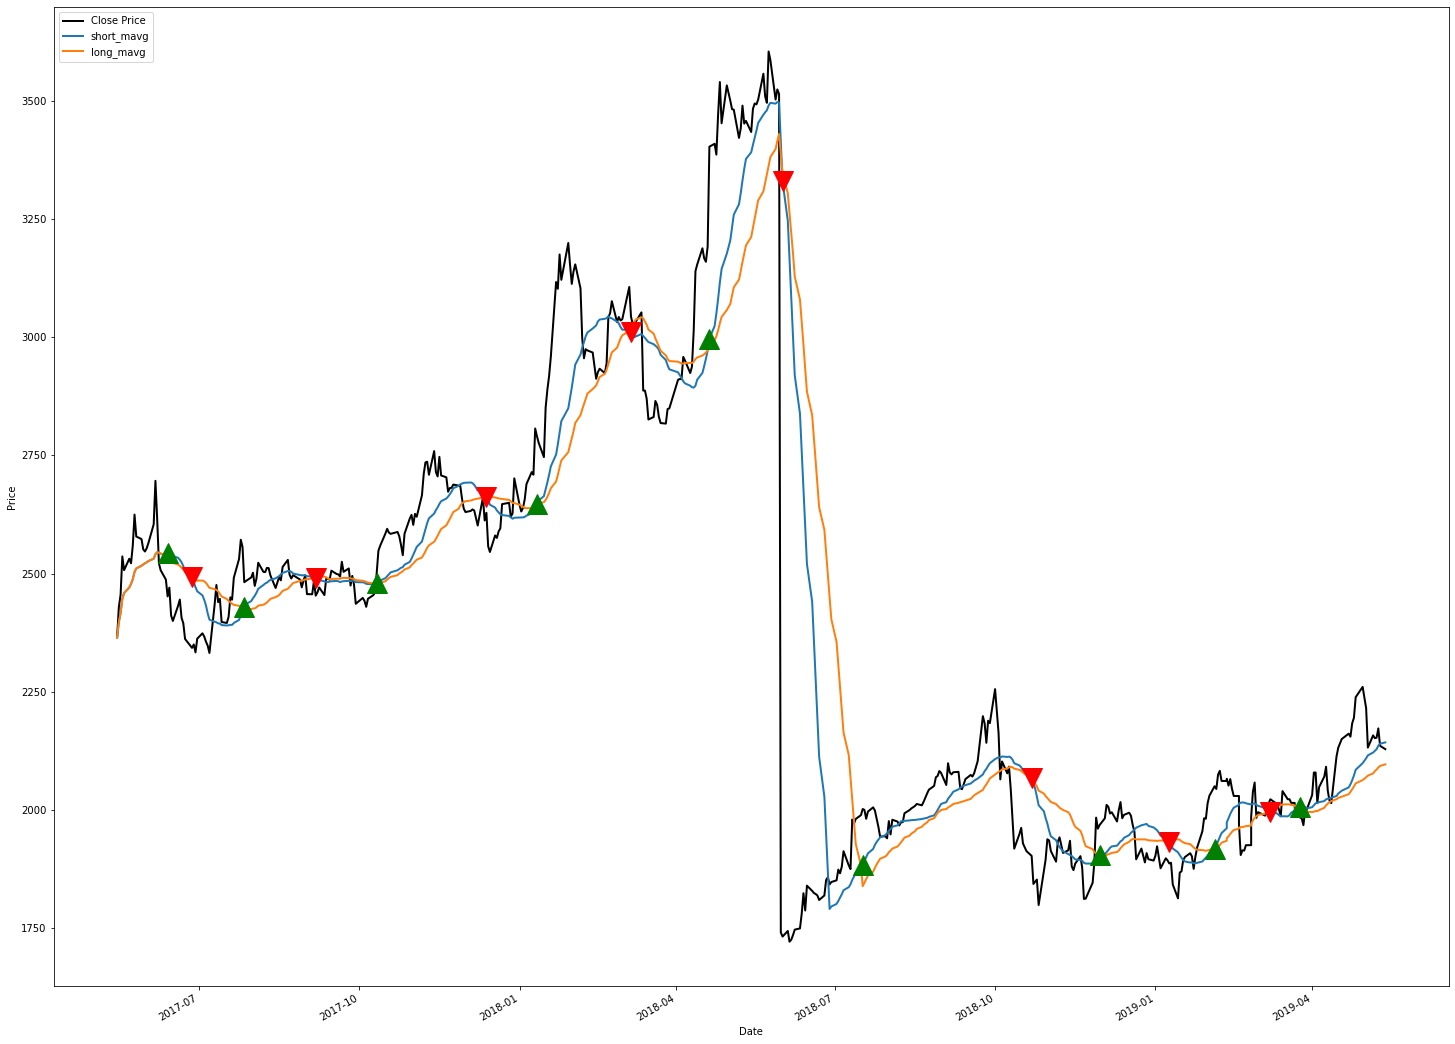

In [28]:
fig=plt.figure(figsize=(25,20))

ax1=fig.add_subplot(111,ylabel='Price')

df_tcs['Close Price'].plot(ax=ax1,color='black',lw=2.)

signals[['short_mavg','long_mavg']].plot(ax=ax1,lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index,signals.short_mavg[signals.positions == 1.0], '^', markersize=20,color='g')
ax1.plot(signals.loc[signals.positions == -1.0].index,signals.short_mavg[signals.positions == -1.0], 'v', markersize=20,color='r')
plt.legend(loc='upper left')
plt.show()

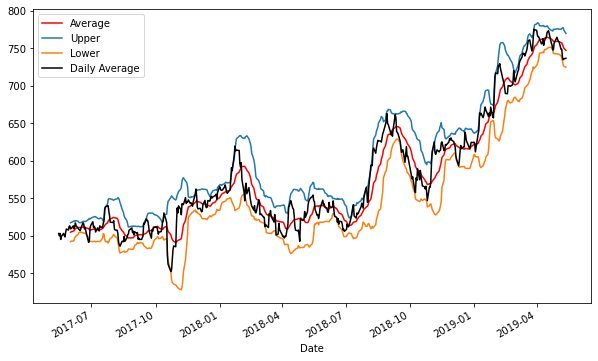

In [29]:
#10
avg=df['Close Price'].rolling(14).mean()
upper=avg+ 2*df['Close Price'].rolling(14).std()
lower=avg- 2*df['Close Price'].rolling(14).std()

plt.figure(figsize=(10,6))
avg.plot(label='Average',color='red')
upper.plot(label='Upper')
lower.plot(label="Lower")
plt.plot(df['Average Price'],label='Daily Average',color='black')
plt.legend()
plt.show()

In [33]:
df_nifty['bollinger']=df_nifty['Close'].rolling(14).mean()
std=df_nifty['Close'].rolling(14).std()
df_nifty['upper']=df_nifty['bollinger']+2*std
df_nifty['lower']=df_nifty['bollinger']-2*std

In [34]:
df_nifty.to_csv('nifty.csv')